In [3]:
import numpy as np
from scipy import linalg as la
from scipy.sparse import linalg as sparla
from os import walk
from scipy.ndimage import imread
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from random import sample
%matplotlib inline

class FacialRec:
    """ 
    Represents a Facial Recognition Database
    which can be initialized with a directory
    of training faces and then queried to match
    new faces to those in the database
    """
    ##########Members##########
    #
    #   F  : All the faces in the database, as a 36000 x 153 array of 153 
    #        flattened images as its columns
    #
    #   mu : Mean image of the images in F as a 36000 array
    #
    #   Fbar  : Differences of images in F from the mean image mu. Same shape as F
    #
    #   U  : Eigenfaces of the database as column vectors. 36000 x 153 array, 
    #        where the first eigenface is given by U[:,0]
    #
    ###########################
    def __init__(self,path):
        """
        Constructor of Facial Recognition. You shouldn't have to change
        anything here, but you do need to implement each of the functions
        below
        """
        self.initFaces(path)
        self.initMeanImage()
        self.initDifferences()
        self.initEigenfaces()
    
    def initFaces(self, path):
        """
        Get the images from the given file path
        """
        self.F = getFaces(path)
        print self.F.shape
    
    def initMeanImage(self):
        """
        Compute the mean images from the images in self.F
        This can be done using just a call to self.F.mean and by
        specifying the correct axis
        """
        self.mu = np.mean(self.F, axis=1)
    
    def initDifferences(self):
        """
        Compute the differences of the faces in self.F
        from the mean image in self.mu and store these in self.Fbar
        
        The result should be the same shape as self.F
        """
        self.Fbar = self.F - self.mu.reshape(self.mu.shape[0], 1)
    
    def initEigenfaces(self):
        """
        Compute the SVD of self.Fbar to generate the eigenfaces
        Store these in self.U, discarding Sig and Vh
        
        Remember to use "full_matrices=False" with sp.linalg.svd
        """
        self.U, s, Vt = la.svd(self.Fbar, full_matrices=False)
        print self.U.shape
    
    def project(self, s):
        """
        Return U_s^T as described in lab.
        """
        return self.U[:,:s].T
    
    def findNearest(self, image, s = 38):
        """
        Find the index of the closest image in F to the given image
        
        Do this by first projecting image into the eigenface basis but using only
        the specified number of eigenfaces. This can be done using a matrix
        multiplication of the first n_faces columns of self.U with image.
        Don't forget to subract off the mean image from image
        
        Compute Fhat similarly, and use np.linalg.norm and np.argmin to find 
        the index where the difference between Fbar_hat and the projected 
        image is the smallest.
        """
        Ut = self.project(s)
        ghat = np.dot(Ut, image - self.mu).reshape((s,1))
        Fhat = np.dot(Ut, self.Fbar)
        
        diff = np.linalg.norm((Fhat - ghat), axis=0)
        return np.argmin(diff)

def getFaces(path="./faces94"):
    """
    Traverse the directory specified by `path' and return an array containing 
    one column vector per subdirectory.
    For the faces94 dataset, this gives an array with just one column for each
    face in the database. Each column corresponds to a flattened grayscale image.
    """
    # Traverse the directory and get one image per subdirectory
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg": # only get jpg images
                # load image, convert to grayscale, flatten into vector
                face = imread(dirpath+"/"+f).mean(axis=2).ravel()
                faces.append(face)
                break
    # put all the face vectors column-wise into a matrix
    F = np.array(faces).T
    return F

def show(im, w=200, h=180):
    """
    Plot the flattened grayscale image `im' of width `w' and height `h' 
    """
    plt.imshow(im.reshape((w,h)), cmap=cm.Greys_r)
    plt.show()

def sampleFaces(n_tests,path = "./faces94"):
    """
    Return an array containing a sample of n_tests images contained
    in the path as flattened images in the columns of the output
    """
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg": # only get jpg images
                files.append(dirpath+"/"+f)
    #Get a sample of the images
    test_files = sample(files, n_tests)
    #Flatten and average the pixel values
    images = np.array([imread(f).mean(axis=2).ravel() for f in test_files]).T
    return images

def show2(im1, im2, w=200, h=180):
    """
    Convenience function for plotting two flattened grayscale images of
    the specified width and height side by side
    """
    plt.subplot(121)
    plt.imshow(im1.reshape((w,h)), cmap=cm.Greys_r)
    plt.subplot(122)
    plt.imshow(im2.reshape((w,h)), cmap=cm.Greys_r)
    plt.show()
    
def test(num_faces = 3, s = 38, path = "./faces94"):
    """
    Testing With Random Faces
    """
    facialRec = FacialRec(path)
    images = sampleFaces(num_faces, path)
    for i in xrange(num_faces):
        nearest = facialRec.findNearest(images[:,i], s)
        show2(images[:,i], facialRec.F[:,nearest])

(36000L, 153L)
(36000L, 153L)


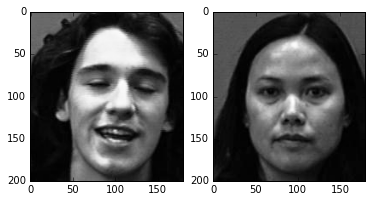

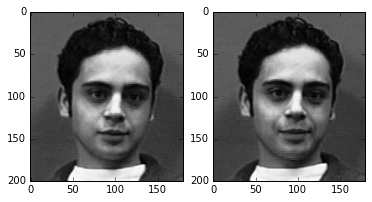

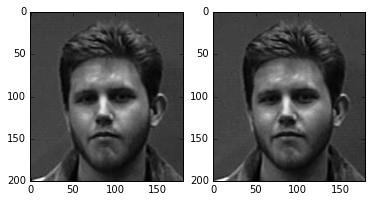

In [4]:
test(num_faces=3)